In [407]:
import warnings
warnings.filterwarnings('ignore')

# Import package
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from matplotlib import rcParams
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
rcParams.update({'font.size': 18})

import statsmodels.api as sm



The documenation describes the columns in the data as follows:

1.) ad_id: unique ID for each ad.

2.) xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3.) fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whom the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [408]:
# data
advertising = pd.read_csv("fbdata.csv")



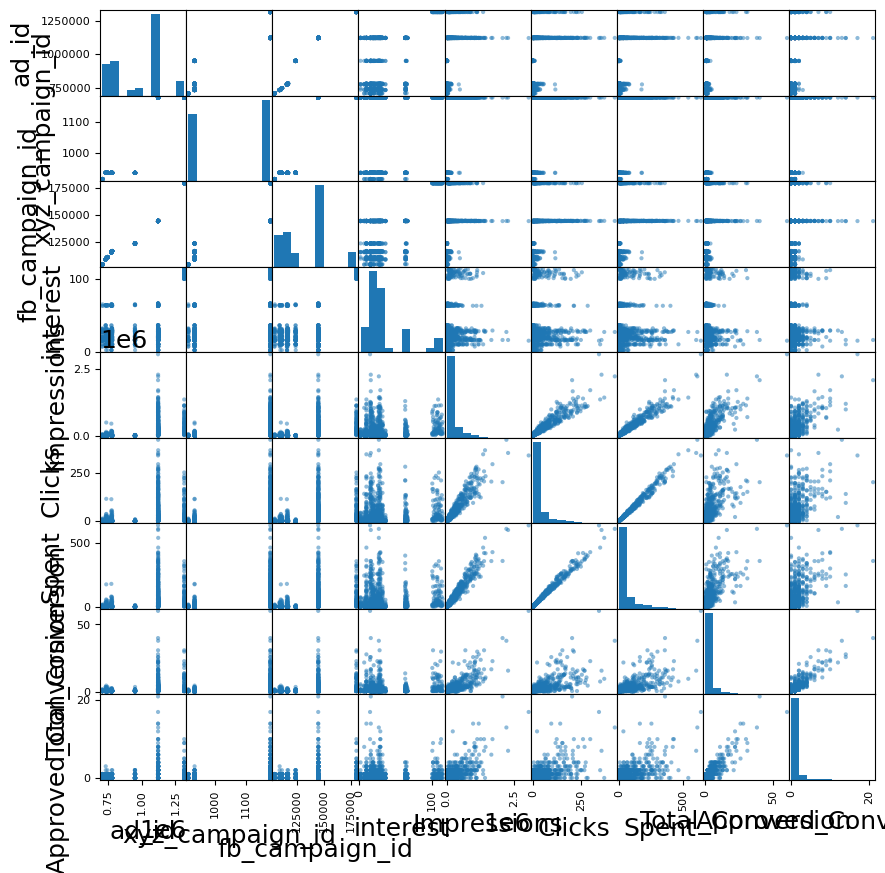

In [74]:

pd.plotting.scatter_matrix(advertising, figsize=(10, 10))
plt.show()


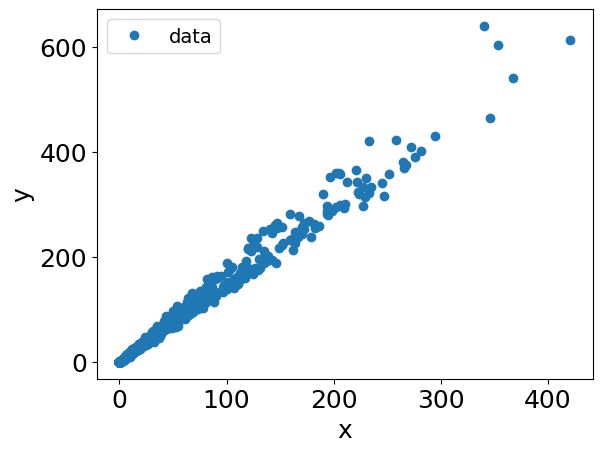

In [60]:
# Let's first plot (x,y) and see what it looks like
plt.plot('Clicks','Spent',data = advertising, marker = 'o', linestyle = '', label = 'data')
plt.xlabel('x',fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

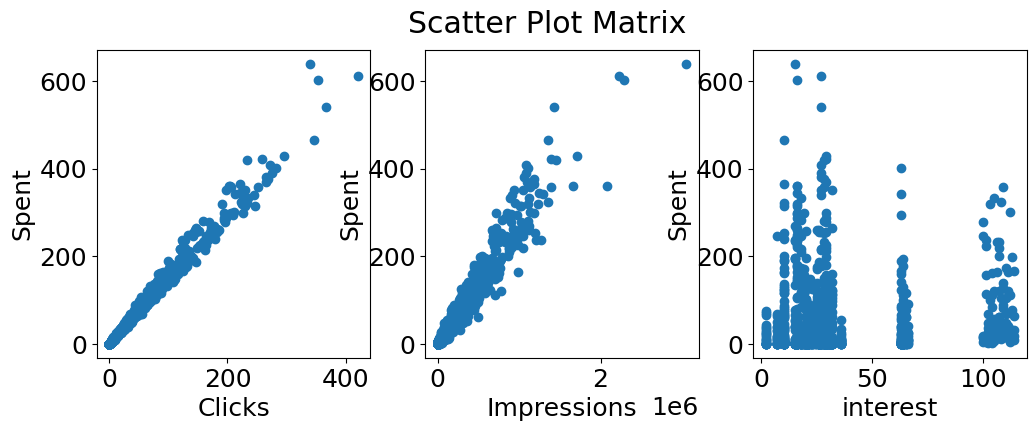

In [75]:

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].scatter(advertising['Clicks'], advertising['Spent'])
axs[0].set_xlabel('Clicks')
axs[0].set_ylabel('Spent')
axs[1].scatter(advertising['Impressions'], advertising['Spent'])
axs[1].set_xlabel('Impressions')
axs[1].set_ylabel('Spent')
axs[2].scatter(advertising['interest'], advertising['Spent'])
axs[2].set_xlabel('interest')
axs[2].set_ylabel('Spent')
fig.suptitle('Scatter Plot Matrix')
plt.show()


##### Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables.  It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance.  It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship. 
+ the Pearson correlation coefficients between all pairs of variables in the advertising dataset.
+ Pearson correlation coefficients range from -1 to 1, with values closer to -1 or 1 indicating a stronger linear relationship between the variables, and values closer to 0 indicating a weaker linear relationship or no relationship at all.

$$\begin{aligned} 
r_{xy} = \frac{\sum\limits_{i=1}^n(x_i-\bar{x})(y_i-\bar{y}) }{\sqrt{\sum\limits_{i=1}^n(x_i-\bar{x}^2)}-\sqrt{\sum\limits_{i=1}^n(y_i-\bar{y}^2)}}

\end{aligned}$$

In [409]:
#Pearson correlation coefficient
correlations = advertising.corr(method='pearson')
correlations


,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
ad_id,1.000000,0.929892,0.972002,0.456483,0.462308,0.431981,0.433053,0.346539,0.271331
xyz_campaign_id,0.929892,1.000000,0.872392,0.272282,0.495273,0.469729,0.476689,0.346684,0.284968
fb_campaign_id,0.972002,0.872392,1.000000,0.595753,0.439439,0.406978,0.403532,0.344170,0.257658
interest,0.456483,0.272282,0.595753,1.000000,0.101973,0.088706,0.070226,0.120270,0.058353
Impressions,0.462308,0.495273,0.439439,0.101973,1.000000,0.948514,0.970386,0.812838,0.684249
Clicks,0.431981,0.469729,0.406978,0.088706,0.948514,1.000000,0.992906,0.694632,0.559526
Spent,0.433053,0.476689,0.403532,0.070226,0.970386,0.992906,1.000000,0.725379,0.593178
Total_Conversion,0.346539,0.346684,0.344170,0.120270,0.812838,0.694632,0.725379,1.000000,0.864034
Approved_Conversion,0.271331,0.284968,0.257658,0.058353,0.684249,0.559526,0.593178,0.864034,1.000000


In [410]:

# abbreviate some variable names
advertising = advertising.rename(columns={"Total_Conversion": "conv", "Impressions": "impr", "Approved_Conversion": "appConv"})
print(advertising.head())


    ad_id  xyz_campaign_id  fb_campaign_id    age gender  interest   impr  \
0  708746              916          103916  30-34      M        15   7350   
1  708749              916          103917  30-34      M        16  17861   
2  708771              916          103920  30-34      M        20    693   
3  708815              916          103928  30-34      M        28   4259   
4  708818              916          103928  30-34      M        28   4133   

   Clicks  Spent  conv  appConv  
0       1   1.43     2        1  
1       2   1.82     2        0  
2       0   0.00     1        0  
3       1   1.25     1        0  
4       1   1.29     1        1  


+ Creating additional features: 
* Click-Through Rate (CTR):the ratio of clicks to impressions, and is often used in digital advertising to evaluate the effectiveness of an ad campaign.
* Cost per Click (CPC): measure of the cost per click in an ad campaign, and is often used to optimize ad spend and maximize return on investment. 
* Cost per Impression (CPI): measure of the cost per impression in an ad campaign, and is often used to compare the relative cost-effectiveness of different advertising channels.

In [411]:
#Creating additional features: 
#advertising.fillna(0, inplace=True)
advertising['CTR'] = 100 * advertising['Clicks'] / advertising['impr']
advertising['CPC'] = advertising['Spent'] / advertising['Clicks']
advertising['CPI'] = advertising['Spent'] / advertising['impr']


Builing the simple Linear Regression model:
$$\begin{aligned} 
y = \beta_0 + \beta_1 x + \epsilon

\end{aligned}$$

Linear Regression Cost Function:
$$\begin{aligned} 
J = \frac{1}{n} \sum\limits_{i=1}^m (\text{pred}_i -y_i)^2

\end{aligned}$$



Gradient Descent Algorithm For Linear Regression:

+ Cost function:
$$\begin{aligned} 
J(\theta_0,\theta_1) = \frac{1}{2m} \sum\limits_{i=1}^m [h_\theta(x_i)-y_i]^2
\end{aligned}$$

$$\begin{aligned} 
J(\theta_0,\theta_1) = \frac{1}{2}(X\theta-y_i)^{T}(X\theta-y_i)
\end{aligned}$$

+ Gradient Descent:

$$\begin{aligned} 
\theta_{j}=\theta_{j}- \alpha * \frac{\partial}{\partial \theta_{j}} J(\theta_0,\theta_1)
\end{aligned}$$

$$\begin{aligned} 
\theta_{j}:=\theta_{j}- \frac{\alpha}{m} \sum\limits_{i=1}^m [(h_\theta(x_j)-y)x_i]
\end{aligned}$$

+ $\theta_{j}$: Weights of the hypothesis.
+ $h_{\theta{(xi)}}$: predicted y value for ith input.
+ j : Feature index number (can be 0, 1, 2, ......, n).
+ $\alpha$ : Learning Rate of Gradient Descent. Learning Rate is the size of each step choosen by us. if Learning Rate was large, the Gradient Descent can overshoot the minimum. It may fail to converge or even diverge. 

* The graph of the cost function: is a function of parameter estimates - parameter range of the hypothesis function - and the cost resulting from selecting a particular set of parameters. 
* We move downward towards pits in the graph, to find the minimum value. 
* The way to do this is taking derivative of cost function. 
* Gradient Descent step-downs the cost function in the direction of the steepest descent. The size of each step is determined by parameter α known as Learning Rate. 

In [286]:
from sklearn.linear_model import Ridge

# Prepare the data for linear regression
X = advertising[['Clicks', 'impr', 'interest', 'CTR', 'CPC', 'CPI', 'conv']]
Y = advertising['Spent']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Replace missing values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Normalize the input features
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Initialize the model parameters
alpha = 0.01
num_iters = 100
ridge_alpha = 0.01

# Create a Ridge model and fit it on the training data
#ridge_model = Ridge(alpha=ridge_alpha)
ridge_model.fit(X_train, Y_train)

# Print the model parameters
print("Intercept:", ridge_model.intercept_)
print("Coefficients:", ridge_model.coef_)

# Make predictions on the test set
Y_pred = ridge_model.predict(X_test)

# Calculate the mean squared error
mse = np.mean((Y_test - Y_pred) ** 2)
print("MSE:", mse)
from sklearn.linear_model import Lasso

# Initialize the model
lasso = Lasso(alpha=0.1)

# Fit the model using the training set
lasso.fit(X_train, Y_train)

# Print the model parameters
print("Intercept:", lasso.intercept_)
print("Coefficients:", lasso.coef_)

# Make predictions on the test set
Y_pred = lasso.predict(X_test)

# Calculate the mean squared error
mse = np.mean((Y_test - Y_pred) ** 2)
print("MSE:", mse)



Intercept: 51.44413745970125
Coefficients: [61.97770288 25.36861028 -1.67792069  4.00017615  3.03419022 -2.9910131
 -1.61838021]
MSE: 56.10281307350321
Intercept: 51.44413745970125
Coefficients: [61.99074272 24.90383986 -1.64896939  0.7901571   2.12669821  0.
 -1.13843179]
MSE: 56.531296852378574


In [412]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

advertising.fillna(0, inplace=True)
# Prepare the data for linear regression
X = advertising[['Clicks', 'impr', 'interest', 'conv']]
Y = advertising['Spent']


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Print the intercept and coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Make predictions on the test set
Y_pred = model.predict(X_test)

# Calculate the mean squared error on the test set
mse = mean_squared_error(Y_test, Y_pred)
print("Mean squared error:", mse)

# Calculate the R-squared value
r2 = r2_score(Y_test, Y_pred)
print("R-squared value:", r2)


Intercept: 2.123117050864316
Coefficients: [ 1.06206309e+00  9.32404686e-05 -7.08090511e-02 -4.54134776e-01]
Mean squared error: 41.43301838473586
R-squared value: 0.9933087112349888


In [416]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Fill in any missing values with 0
advertising.fillna(0, inplace=True)

# Prepare the data for linear regression
X = advertising[['Clicks', 'impr', 'interest', 'conv']]
Y = advertising['Spent']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# Normalize the input features
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Add a column of ones for the bias term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize the model parameters
theta = np.zeros(X_train.shape[1])

# Set the learning rate and number of iterations
alpha = 0.1
num_iters = 1000

# Define the cost function
def compute_cost(X, Y, theta):
    m = Y.shape[0]
    J = 1 / (2*m) * np.sum((np.dot(X, theta) - Y) ** 2)
    return J

# Define the gradient descent algorithm
def gradient_descent(X, Y, theta, alpha, num_iters):
    m = Y.shape[0]
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        theta = theta - alpha * (1 / m) * np.dot(X.T, (np.dot(X, theta) - Y))
        J_history[i] = compute_cost(X, Y, theta)
    return theta, J_history

# Fit the linear regression model using gradient descent
theta, J_history = gradient_descent(X_train, Y_train, theta, alpha, num_iters)

# Make predictions on the test set
theta_without_bias = theta[1:]
Y_pred = np.dot(X_test[:,1:], theta_without_bias)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, Y_pred)

# Calculate the R-squared value
r2 = r2_score(Y_test, Y_pred)

# Print the model parameters, final cost, and evaluation metrics
print("Intercept:", theta[0])
print("Coefficients:", theta[1:])
print("Final cost:", J_history[-1])
print("Mean squared error:", mse)
print("R-squared value:", r2)


Intercept: 54.16630651882771
Coefficients: [61.00498054 30.60854961 -1.92553458 -2.24885085]
Final cost: 19.480076292333198
Mean squared error: 2293.732125872173
R-squared value: 0.6700668690411828


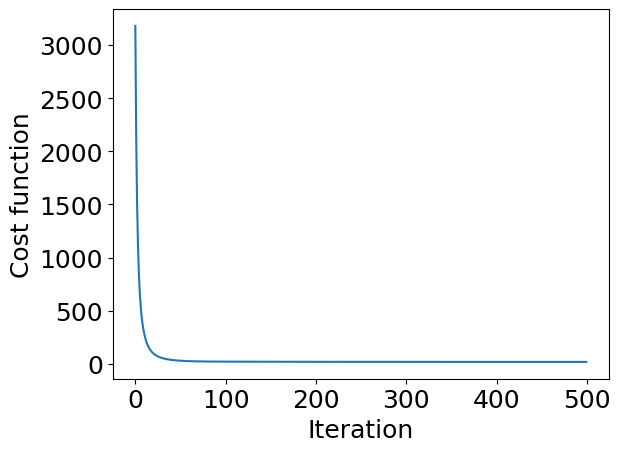

In [355]:
# Plot the cost function over time
plt.plot(np.arange(num_iters), J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost function")
plt.show()

* Intercept: 2.123117050864316
* Coefficients: [ 1.06206309e+00  9.32404686e-05 -7.08090511e-02 -4.54134776e-01]
* Mean squared error: 41.43301838473586
* R-squared value: 0.9933087112349888

In [406]:
# Fill in any missing values with 0
advertising.fillna(0, inplace=True)

# Prepare the data for linear regression
X = advertising[['Clicks', 'impr', 'interest', 'conv']]
Y = advertising['Spent']

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# Normalize the input features
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Add a column of ones for the bias term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize the model parameters
theta = np.zeros(X_train.shape[1])

# Set the learning rate and number of iterations for SGD
alpha = 0.0000000000000001
num_iters = 100000000000

# Define the cost function
def compute_cost(X, Y, theta):
    m = Y.shape[0]
    J = 1 / (2*m) * np.sum((np.dot(X, theta) - Y) ** 2)
    return J

# Define the Stochastic Gradient Descent algorithm
def stochastic_gradient_descent(X, Y, theta, alpha, num_iters):
    m = Y.shape[0]
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        for j in range(m):
            rand_idx = np.random.randint(0, m)
            xi = X[rand_idx,:].reshape(1,-1)
            yi = Y[rand_idx].reshape(1,-1)
            theta = theta - alpha * np.dot(xi.T, (np.dot(xi, theta) - yi))
        J_history[i] = compute_cost(X, Y, theta)
    return theta, J_history

# Fit the linear regression model using Stochastic Gradient Descent
theta, J_history = stochastic_gradient_descent(X_train, Y_train, theta, alpha, num_iters)

# Make predictions on the test set
theta_without_bias = theta[1:]
Y_pred = np.dot(X_test[:,1:], theta_without_bias)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, Y_pred)

# Calculate the R-squared value
r2 = r2_score(Y_test, Y_pred)

# Print the model parameters, final cost, and evaluation metrics
print("Intercept:", theta[0])
print("Coefficients:", theta[1:])
print("Final cost:", J_history[-1])
print("Mean squared error:", mse)
print("R-squared value:", r2)


KeyError: 286

1000 iterations
Updated coefficients [0.01690604893501754, 1.5221231688233812]
Cost(MSE): 107.04774259398802
Current accuracy is : 0.8830696637581831


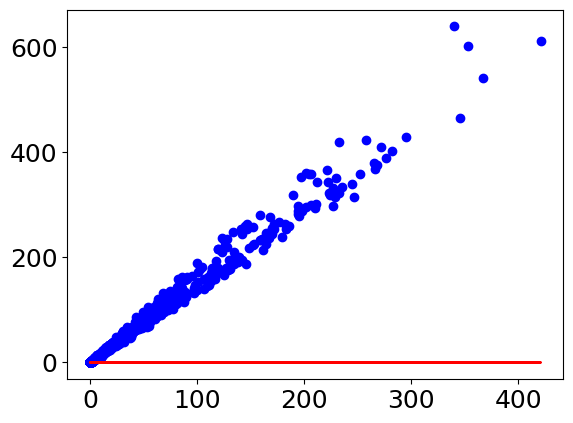

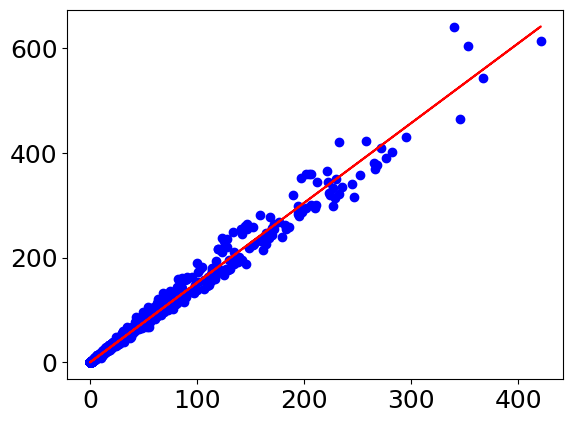

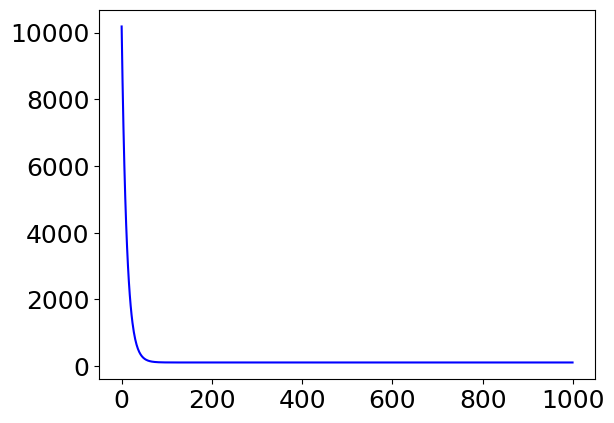

In [13]:


class Linear_Regression:
	def __init__(self, X, Y):
		self.X = X
		self.Y = Y
		self.b = [0, 0] #np.random.rand(2)
	

	# Parameter Updation
	def update_coeffs(self, learning_rate):
		Y_pred = self.predict()
		Y = self.Y
		m = len(Y)
		
			
			# b = b - (learning_rate * (dJ/db))
			# The trace of A is the sum of its diagonal entries
		self.b[0] = self.b[0] - (learning_rate * ((1/m) *
								np.sum(Y_pred - Y)))

		self.b[1] = self.b[1] - (learning_rate * ((1/m) *
								np.sum((Y_pred - Y) * self.X)))
		
		return self.b
		
	#prediction function: (y) = beta_0 + (beta_1 * x) adding 
	def predict(self, X=[]):
		Y_pred = np.array([])
		if not X: X = self.X
		b = self.b
		for x in X:
			Y_pred = np.append(Y_pred, b[0] + (b[1] * x)) 
		return Y_pred
	
	def get_current_accuracy(self, Y_pred):
		p, e = Y_pred, self.Y
		n = len(Y_pred)
		return 1-sum(
			[
				abs(p[i]-e[i])/e[i]
				for i in range(n)
				if e[i] != 0]
		)/n
	
	# MSE: GS
	def compute_cost(self, Y_pred):
		m = len(self.Y)
		J = 1/(m) * np.sum((Y_pred - Y)**2)
		return J

	


	def plot_best_fit(self, Y_pred, fig):
				f = plt.figure(fig)
				plt.scatter(self.X, self.Y, color='b')
				plt.plot(self.X, Y_pred, color='r')
				f.show()
    
    

X = np.array([x for x in X])
Y = np.array([y for y in Y])

def main():
    regressor = Linear_Regression(X, Y)
    iterations = 0
    steps = 1000
    learning_rate = 0.00001
    costs = [] #mse
    updated_b = []  # store updated values of b
    
    

    #original best-fit line
    Y_pred = regressor.predict()
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')
    
    while 1:
        Y_pred = regressor.predict()
        cost = regressor.compute_cost(Y_pred)
        costs.append(cost)
        
        
        updated_b = regressor.update_coeffs(learning_rate)  # get updated values of b
        iterations += 1

        if iterations % steps == 0:
            print(iterations, "iterations")
            
            
            
            stop = input("Do you want to stop (y/*)??")
            if stop == "y":
                break
 
            
            # Check for convergence
        if len(costs) >= 2 and abs(costs[-1] - costs[-2]) < 1e-7:
            print("Converged at iteration:", iterations)
            break
            
            
            
        
            
    
    print("Updated coefficients", updated_b)  # print updated values of b for last iteration
    print("Cost(MSE):", cost)
    print("Current accuracy is :",
                  regressor.get_current_accuracy(Y_pred))
   
    #final best-fit line
    regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

    #plot to verify cost function decreases
    h = plt.figure('Verification')
    plt.plot(range(iterations), costs, color='b')
    h.show()

    # if user wants to predict using the regressor:
    #regressor.predict([i for i in range(0)])
    
    

if __name__ == '__main__':
    main()





In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class MultiLinearRegression:
    def __init__(self, X, Y):
        self.X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.Y = Y.values.reshape(-1, 1)
        self.b = np.zeros((self.X.shape[1], 1))

    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        m = len(self.Y)
        error = Y_pred - self.Y
        gradient = (1/m) * np.dot(self.X.T, error)
        self.b -= learning_rate * gradient
        return self.b

    def predict(self, X=None):
        if X is None:
            X = self.X
        return np.dot(X, self.b)

    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1/(2*m)) * np.sum((Y_pred - self.Y)**2)
        return J

    def r_squared(self, Y_pred):
        sse = np.sum((self.Y - Y_pred)**2)
        sst = np.sum((self.Y - np.mean(self.Y))**2)
        r2 = 1 - (sse/sst)
        return r2

    def plot_best_fit(self, Y_pred, fig):
        f = plt.figure(fig)
        plt.scatter(self.X[:, 1], self.Y, color='b')
        plt.plot(self.X[:, 1], Y_pred, color='r')
        f.show()

advertising.fillna(0, inplace=True)

# Prepare the data for linear regression
X = advertising[['Clicks', 'impr', 'interest', 'CTR', 'CPC', 'CPI', 'conv']]
Y = advertising['Spent']


# Normalize the input features
X = (X - X.mean()) / X.std()

regressor = MultiLinearRegression(X, Y)

iterations = 0
steps = 9000
learning_rate = 0.01
convergence_threshold = 1e-6
costs = []
updated_b = []



while 1:
    Y_pred = regressor.predict()
    r2 = regressor.r_squared(Y_pred)
    cost = regressor.compute_cost(Y_pred)
    costs.append(cost)

    updated_b = regressor.update_coeffs(learning_rate)
    iterations += 1

    if iterations % steps == 0:
        print("Iteration:", iterations)
        
        stop = input("Do you want to stop (y/*)??")
        if stop == "y":
            break
        
        if len(costs) >= 2 and np.abs(cost - costs[-2])<1e-9:
            print("Converged at iteration:", iterations)  
            break
            
print("Updated b:", updated_b.ravel())
print("Cost:", cost)
print("R-squared:", r2)

Iteration: 9000
Updated b: [51.36065613 60.20409106 29.07152641 -1.84273307 -5.51003155 -0.52740167
  6.46985966 -2.3278282 ]
Cost: 18.248293575686695
R-squared: 0.9951637505540942
